# SENTIMENT ANALYSIS PILPRES 2024 #

### Muchammad Fahd Ishamuddin
### 41155050180048

## MENGGUNAKAN METODE CRISP-DM
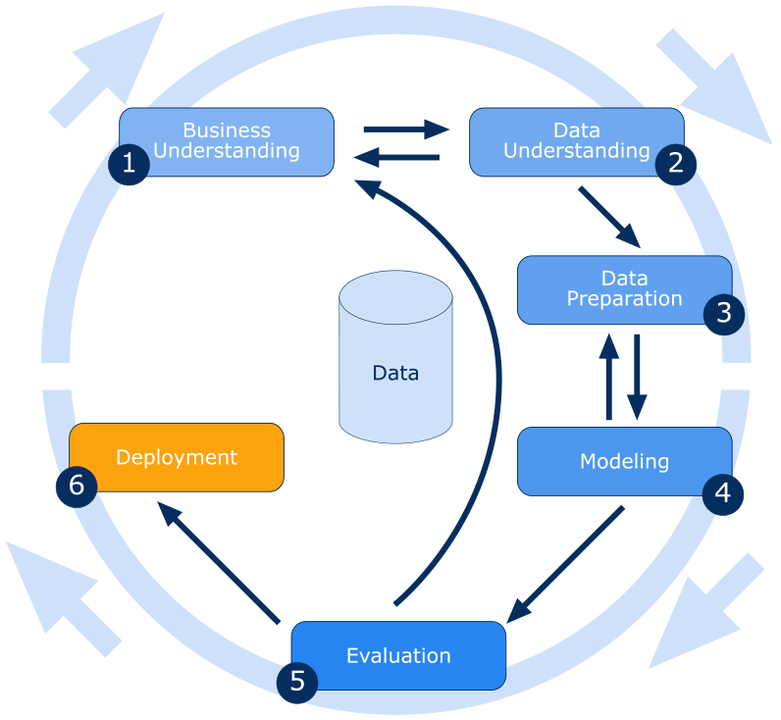

IMPORT LIBRARY yang dibutuhkan:
1. re untuk regex
2. pandas untuk dataframe
3. numpy untuk operasi angka
4. matplotlib dan seaborn untuk visualisasi data
5. nltk untuk natural language toolkit
6. sastrawi untuk NLTK bahasa indonesia

In [1]:
%matplotlib inline

import re
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import nltk
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [2]:
data  = pd.read_csv('2022sen.csv')
print('data ada sebanyak',len(data),'baris')
data.columns
data.dtypes
len(data)

data ada sebanyak 112844 baris


112844

In [3]:
data.head()

,Unnamed: 0,date,id,tweet,username
0,0,2022-12-30 23:50:32+00:00,1.608974e+18,"Berkat kinerja di BUMN, serta kedekatan dengan...",Fuad_Lha9
1,1,2022-12-30 23:50:16+00:00,1.608974e+18,@ganjarpranowo menggandeng ulama hingga tokoh ...,iwan_tata98
2,2,2022-12-30 23:40:27+00:00,1.608971e+18,Mantap 👍👍\nElektabilitas Menteri BUMN Erick Th...,Lima8Satu
3,3,2022-12-30 23:36:07+00:00,1.608970e+18,"Baru Lolos Sebagai Peserta Pemilu 2024, Partai...",21BeritaTerkini
4,4,2022-12-30 23:26:47+00:00,1.608968e+18,Agenda politik negara tuan rumah Piala Dunia 2...,rezakaisar3


# Cleaning data

In [4]:
data = data.drop('Unnamed: 0', axis = 1)

In [5]:
data.columns

Index(['date', 'id', 'tweet', 'username'], dtype='object')

In [6]:
data.isnull().sum()

date        0
id          3
tweet       3
username    6
dtype: int64

In [7]:
data = data.dropna()
data.isnull().sum()


date        0
id          0
tweet       0
username    0
dtype: int64

> Data yang sebelumnya sebanyak 112844 menjadi 112838 (menghilang 6 data)

> Mengapa dihapus? karena jumlahnya hanya 6 dan tidak akan mempengaruhi pada hasil machine learning nanti



In [9]:
data.tweet.loc[23200]

'Menteri BUMN Erick Thohir dinilai sangat layak maju sebagai cawapres di Pilpres 2024.\n\nKarena Menteri BUMN Erick Thohir dinilai mampu menyatukan suara umat dari berbagai kelompok.\n\nCc.\n@erickthohir \n\n#BangkitBersamaET https://t.co/RTEknh4cGg'

In [12]:
duplikasi = len(data.tweet)-len(data.tweet.drop_duplicates())
print(f'ada sebanyak {duplikasi} data yang terduplikasi')

ada sebanyak 1989 data yang terduplikasi


In [13]:
x = data.groupby(data.tweet.tolist(), as_index=False).size()
x.sort_values(by='size',ascending=False)


,index,size
97149,Saya dukung di pilpres 2024 ya pak @ridwankamil,40
34625,@rkij_sukabumi @ridwankamil Saya dukung di pil...,34
38023,AHY Minim Prestasi Tapi Nekad Maju Pilpres htt...,32
1145,#Mangkrak.\nsiapa yang betah+doyan dikibulin d...,29
41673,Anis merupakan sosok yang tidak cocok untuk me...,29
...,...,...
36973,@wawanjangkarmas @WagimanDeep212_ @jokowi Mash...,1
36972,@wawanalwan27 @TriSartopo @Mdy_Asmara1701 @ani...,1
36971,@wawan_purwandl @prabowo @cakimiNOW @gusyusufc...,1
36970,@wawan_purwandl @cakimiNOW Maju terus Gus Muha...,1


In [16]:
a = (x['size'] > 1).sum()
print(f'jadi ada tweet sebanyak {a} yang memiliki cuitan yang sama dengan total {duplikasi} tweet')

jadi ada tweet sebanyak 842 yang memiliki cuitan yang sama dengan total 1989 tweet


In [17]:
data = data.drop_duplicates(subset=['tweet'])

In [19]:
duplikasi = len(data.tweet)-len(data.tweet.drop_duplicates())
print(f'ada sebanyak {duplikasi} data yang terduplikasi')

ada sebanyak 0 data yang terduplikasi


In [20]:
x = data.groupby(data.tweet.tolist(), as_index=False).size()
x.sort_values(by='size',ascending=False)

,index,size
0,! Boom ! Airlangga - Ganjar pasangan ideal di ...,1
73896,"Menuju Pilpres 2024, dukungan terhadap Ketua D...",1
73907,"Menuju Pilpres 2024, kader Partai Golkar dari ...",1
73906,"Menuju Pilpres 2024, elektabilitas Ridwan Kami...",1
73905,"Menuju Pilpres 2024, dukungan terhadap Ketua D...",1
...,...,...
36946,@walhijawatengah @farmer01047364 @Wadas_Melawa...,1
36945,@wakit45149757 @Relawananies Anies pernah bers...,1
36944,@wajahsementara @Naibaho_gt @muhammadrobbah @U...,1
36943,@wahyuryan_wf Yg sekarang di pakai kadrun untu...,1


In [21]:
len(data)

110849

In [22]:
# x= data.username
# c={}
# q=0
# for name in x:
#     c[name] = c.get(name,0)+1
# print(c)
# c = pd.DataFrame({'usename':c.keys(),'count':c.values()})
# print (c)
# c.info()
# c.to_csv('username_count')
data.username.value_counts()

jpnncom          989
WartaEkonomi     729
detikcom         708
fajaronline      612
OposisiCerdas    478
                ... 
rab_yuli           1
KangMas2012        1
anggihawawi        1
plasmasitrat       1
ninovendri         1
Name: username, Length: 28387, dtype: int64

In [23]:
data

,date,id,tweet,username
0,2022-12-30 23:50:32+00:00,1.608974e+18,"Berkat kinerja di BUMN, serta kedekatan dengan...",Fuad_Lha9
1,2022-12-30 23:50:16+00:00,1.608974e+18,@ganjarpranowo menggandeng ulama hingga tokoh ...,iwan_tata98
2,2022-12-30 23:40:27+00:00,1.608971e+18,Mantap 👍👍\nElektabilitas Menteri BUMN Erick Th...,Lima8Satu
3,2022-12-30 23:36:07+00:00,1.608970e+18,"Baru Lolos Sebagai Peserta Pemilu 2024, Partai...",21BeritaTerkini
4,2022-12-30 23:26:47+00:00,1.608968e+18,Agenda politik negara tuan rumah Piala Dunia 2...,rezakaisar3
...,...,...,...,...
112839,2022-01-01 02:06:49+00:00,1.477099e+18,@machbeach @Kuli__proyek @Lady_Zeebo @DivHumas...,laelatul
112840,2022-01-01 01:55:42+00:00,1.477096e+18,@ekoguruoke @mohmahfudmd hahahahaha...bls twee...,amira_suud
112841,2022-01-01 01:49:00+00:00,1.477094e+18,@johnhendri2016 @kinoysuki @geloraco Wkwkwkwkw...,samuelmengi86
112842,2022-01-01 00:38:55+00:00,1.477077e+18,"Bursa Pilpres 2024, Anies Baswedan Makin Melej...",teropongmetro


In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/fahdmuchammad/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk import word_tokenize
import re
import string

def preprocess_tweet(tweet):
    EMOJI_PATTERN = re.compile(
    "(["
    "\U0001F1E0-\U0001F1FF"  # flags (iOS)
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F600-\U0001F64F"  # emoticons
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F700-\U0001F77F"  # alchemical symbols
    "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
    "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
    "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    "\U0001FA00-\U0001FA6F"  # Chess Symbols
    "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
    "\U00002702-\U000027B0"  # Dingbats
    "])")
    tweet = re.sub(r'[0-9]+','', str(tweet))
    tweet = tweet.lower() #casefolding
    tweet = re.sub(r'http\S+', '', tweet, flags=re.MULTILINE)
    tweet = re.sub(r'@[A-Za-z0-9_]+', '', tweet) #hapus mention
    tweet = re.sub(r'#[A-Za-z0-9_]+', '', tweet) #hapus hashtag
    tweet = re.sub(r'\d+', '', tweet)
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    tweet = re.sub(r'\s+', ' ', tweet)
    tweet = tweet.strip()
    tweet = re.sub(EMOJI_PATTERN, r'', tweet)
    return tweet
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
factory = StemmerFactory()
stemmer = factory.create_stemmer()
def sentiment_analysis(tweet):
    tweet = preprocess_tweet(tweet)
    tweet_tokens = word_tokenize(tweet) #tokenize
    clean_tokens = [stemmer.stem(word) for word in tweet_tokens if word not in stopwords] #stemming & stopword removal
    positive_words = open("positive.txt").read().splitlines()
    negative_words = open("negative.txt").read().splitlines()
    positive_count = sum([1 for word in clean_tokens if word in positive_words])
    negative_count = sum([1 for word in clean_tokens if word in negative_words])
    if positive_count > negative_count:
        return 'Positive'
    elif positive_count < negative_count:
        return 'Negative'
    else:
        return 'Neutral'
data['sentiment'] = data['tweet'].apply(sentiment_analysis)

In [ ]:
data.head()

In [ ]:
data.to_csv('hasilklasifikasi.csv', index=False)
data.sentiment.value_counts()

In [ ]:
data.sentiment.value_counts(normalize=True)
data.tweet.value_counts()

In [ ]:
p = 51716
net = 37225
neg = 21908
labels = ['Positive ['+str(p)+'] 46%' , 'Neutral ['+str(net)+'] 33%','Negative ['+str(neg)+'] 20%']
size = [p,net,neg]
colors = ["#81F495","#A9E4EF","#FF3C38"]
patches, texts = plt.pie(size, colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title('Number of tweet')
plt.axis('equal')
plt.show()

In [ ]:
duplikasi = len(data.tweet)-len(data.tweet.drop_duplicates())
print(f'ada sebanyak {duplikasi} data yang terduplikasi')